# base ball
목표: 날씨 조건에 따라 야구를 할 것인지 예측하는 모델 구현

- 프로젝트 목표
    - 목표: 날씨 조건에 따라 야구를 할 것인지 예측하는 모델 구현
    - 기존 문제: 실시간 날씨 변화에 따른 야구 가능 여부 예측의 어려움 및 정확도 부족
    - 해결 방법: 머신 러닝 모델 (Decision Tree)을 사용하여 정확한 날씨 정보를 입력하면 야구 가능 여부 예측

- 데이터 소개
    - 데이터: CSV 파일로 제공
    - 열: Weather, Temperature, Humidity, Windy, Play
    - 범주형 데이터:  Weather, Temperature, Humidity, Windy, Play 열을 숫자로 변화

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

## CSV 파일 로드

In [2]:
data = pd.read_csv('/Users/project/python/classification/base_ball_dataset.csv')
data

,weather,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
data.shape

(14, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   weather      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


## 입력 특성과 타깃 분리

In [6]:
X = data.iloc[:, :-1]  # 마지막 열을 제외한 나머지 열은 입력 특성
y = data.iloc[:, -1]   # 마지막 열은 타깃 변수

### 범주형 데이터를 숫자로 변환

In [7]:
X_encoded = pd.get_dummies(X, columns=['weather', 'temperature', 'humidity', 'windy'])
X_encoded

,weather_overcast,weather_rainy,weather_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,False,False,True,False,True,False,True,False,True,False
1,False,False,True,False,True,False,True,False,False,True
2,True,False,False,False,True,False,True,False,True,False
3,False,True,False,False,False,True,True,False,True,False
4,False,True,False,True,False,False,False,True,True,False
5,False,True,False,True,False,False,False,True,False,True
6,True,False,False,True,False,False,False,True,False,True
7,False,False,True,False,False,True,True,False,True,False
8,False,False,True,True,False,False,False,True,True,False
9,False,True,False,False,False,True,False,True,True,False


## 학습 데이터와 테스트 데이터로 분할

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, 
                                                    test_size=0.2, 
                                                    random_state=30)

In [9]:
print(f'X train shape : {X_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (11, 10)
y train shape : (11,)
X test shape : (3, 10)
y test shape : (3,)


## 결정 트리 모델 훈련

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print('depth: ', model.get_depth())
print('leef node: ', model.get_n_leaves())

depth:  4
leef node:  7


### 테스트 데이터에 대한 정확도 계산

In [11]:
accuracy = model.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 1.0


## 

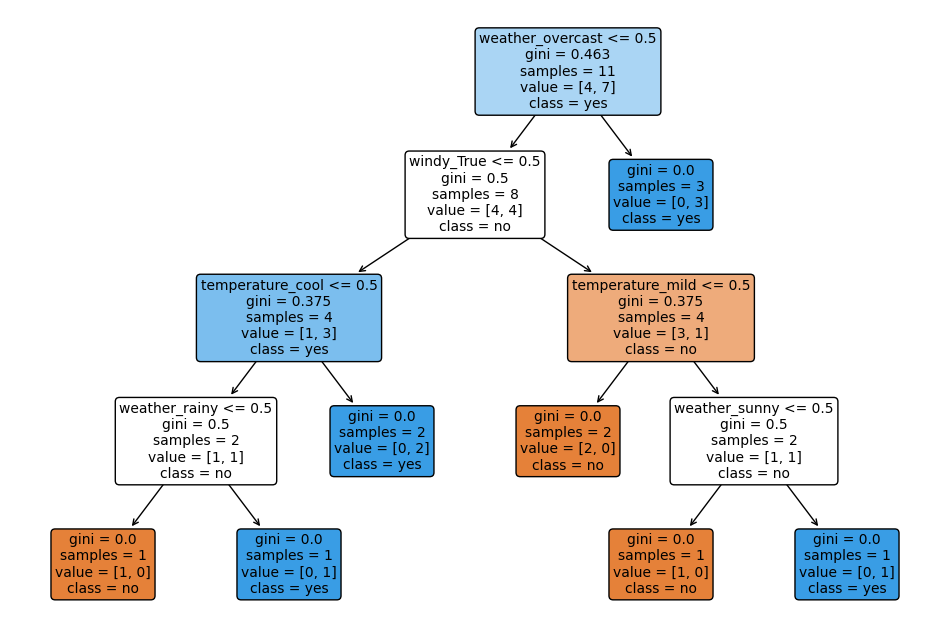

In [15]:
plt.figure(figsize=(12, 8))
tree.plot_tree(model, 
               feature_names=X_encoded.columns.tolist(), 
               class_names=model.classes_.tolist(),
               filled=True, rounded=True)
plt.show()
